In [1]:
from frcnn.dataset.feeder import VOCFeeder
from frcnn.configs.hparams import hparams
import tensorflow as tf
import matplotlib.pyplot as plt
from frcnn.models.components import VGG16

%matplotlib inline


In [2]:
feeder = VOCFeeder(hparams.train_preproc)
with tf.Session() as sess:
    placeholder = tf.placeholder(tf.float32, (None, None, None, 3))
    vgg = VGG16()
    output = vgg(placeholder, 'stack_conv_5/conv_3')
    vgg.load('pretrain/vgg_16.ckpt', sess)
    for i in range(1):
        data = feeder._prepare_batch(1)
        img = data[0]
        out = sess.run([output], feed_dict={placeholder:img})

+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                               __     __  _____    _____                                                                |
|                                                              | |    / / / ___ \  / ___ \                                                               |
|                                                              | |   / / / /  /_/ / /  /_/                                                               |
|                                                              | |  / / / / ____ / / ____                                                                |
|                                                              | | / / / / /  _// / /  _/                                                                |
|                                                              | |/ / 

INFO:tensorflow:|                                                              Restoring parameters from pretrain/vgg_16.ckpt                                                              |


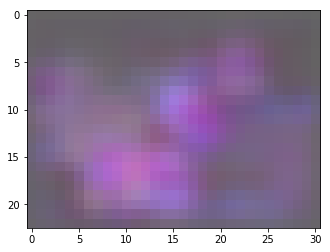

In [14]:
import numpy as np
img = out[0][0]
img = np.maxim
img = (img - np.min(img)) / (np.max(img) - np.min(img))
plt.imshow(img[:, :, :3])